## 科比投篮数据可视化项目

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

#### 各个特征值的含义说明:

- action_type 进攻方式（更具体）
    - ('跳投','上篮','扣篮','补篮','勾手','擦板')
- combined_shot_type 进攻方式
- game_event_id 比赛时间id
- game_id 比赛ID
- lat 投篮点(维度)
- loc_x 投篮点
- loc_y 投篮点
- lon 投篮点(经度)_
- minutes_remaining 单节剩余时间（分钟）
- period 表示第几节 (5,6,7节都是加时赛)
- playoffs 是否是季后赛
- season 赛季
- seconds_remaining 剩余时间（秒）
- shot_distance 投篮距离
- shot_made_flag 是否进球
- shot_type 两分球或三分球
- shot_zone_area 投篮区域
- shot_zone_basic 投篮区域（更具体）
    - ('中距离','进攻有理区','底线之外的三分',
    -   '除进攻有理区外的禁区','右边底线三分','左边底线三分','后场')
- shot_zone_range 投篮范围
- team_id 球队ID
- team_name 球队名称
- game_date 比赛日期
- matchup 比赛双方
- opponent 对手
- shot_id 投篮ID


### 读取科比投篮数据

In [2]:
df = pd.read_csv('data/kobe.csv')
df.shape

(30697, 25)

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


### 1, 分别根据投篮点坐标(loc_x, loc_y) 和 投篮经纬度(lat, lon)画出科比投篮的位置
- (2个散点图， 使用子图) 

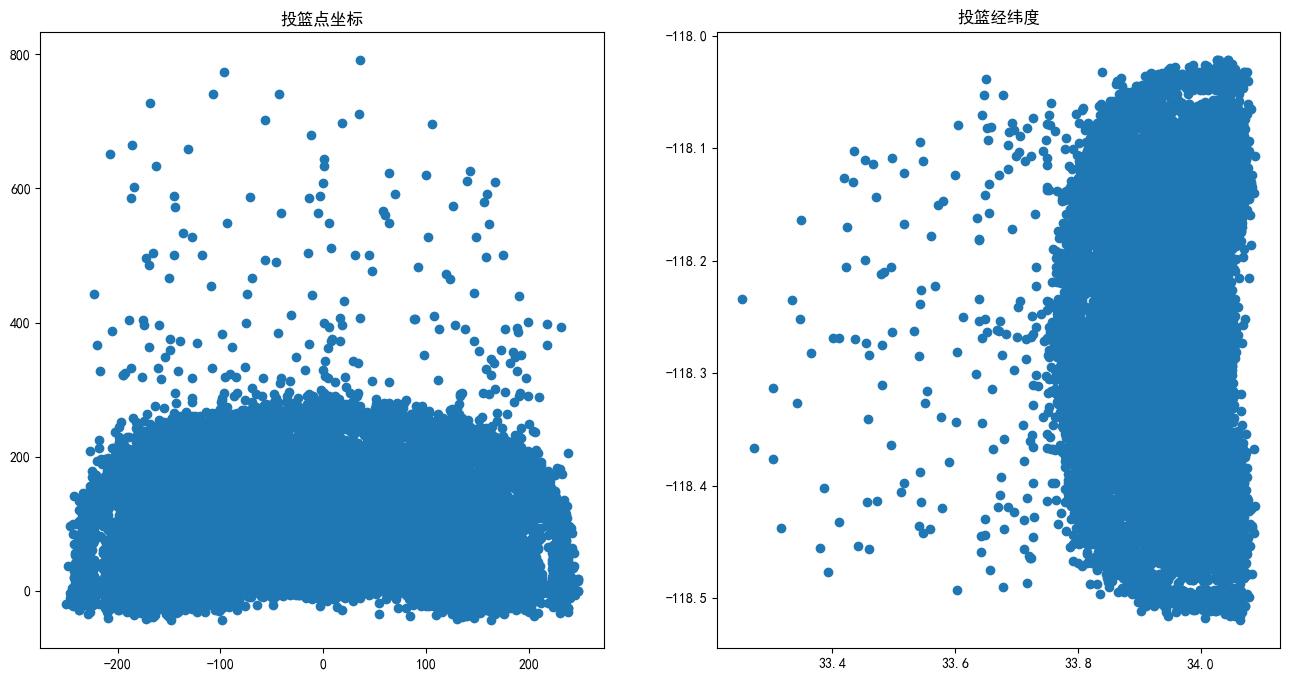

In [4]:
plt.figure(figsize=(8*2,  8))

axes1 = plt.subplot(1, 2, 1)
axes1.scatter(df['loc_x'], df['loc_y'])
axes1.set_title('投篮点坐标', fontsize=12)

axes2 = plt.subplot(1, 2, 2)
axes2.scatter(df['lat'] , df['lon'])
axes2.set_title('投篮经纬度', fontsize=12)

plt.savefig('images/8-1.png')
plt.show()

### 2. 画图对比科比的出手方式action_type的次数,得出科比哪种出手方式最多
- 使用条形图
- 画图显示前10个即可

<BarContainer object of 10 artists>

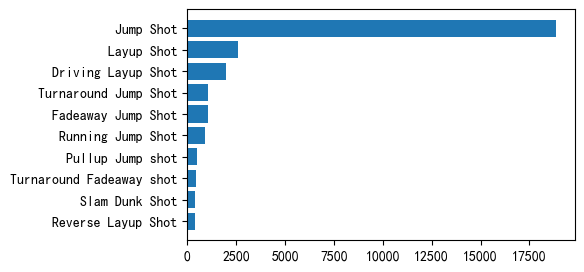

In [11]:
# df['action_type'].value_counts().head(10)[::-1].plot.barh(figsize=(8, 4))
# plt.savefig('images/8-2.png')

action_type = df['action_type'].value_counts().head(10)[::-1]
plt.figure(figsize=(5, 3))
plt.barh(action_type.index, action_type.values)

### 3. 科比各种投篮方式命中率 可视化对比 
- combined_shot_type 投篮方式

In [13]:
df.shot_made_flag

0        NaN
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
30692    0.0
30693    NaN
30694    1.0
30695    0.0
30696    0.0
Name: shot_made_flag, Length: 30697, dtype: float64

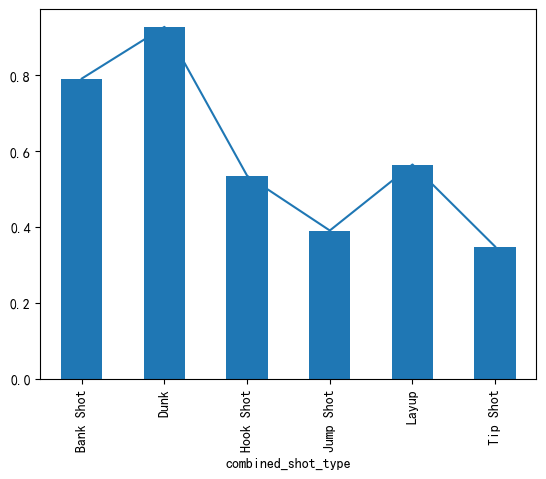

In [6]:
# 每一种投篮方式 命中次数
action_type_sum = df.groupby('combined_shot_type')['shot_made_flag'].sum() 
# 每一种投篮方式 投篮总次数
action_type_count = df.groupby('combined_shot_type')['shot_made_flag'].count() 

action_type_rate = action_type_sum / action_type_count
# 这种画法是一种快捷画法
action_type_rate.plot()
action_type_rate.plot.bar()
plt.savefig('images/8-3.png')

### 4. 科比在各区域投篮对比 
- 画散点图，并使用cmap="rainbow"区分颜色
- 画3个子图： shot_zone_basic， shot_zone_range， shot_zone_area

In [7]:
# 后面需要将值当做颜色color来使用，所以需要先将相同的字符串用同一个数字来表示
df['shot_zone_area'] = df['shot_zone_area'].factorize()[0]
df['shot_zone_range'] = df['shot_zone_range'].factorize()[0]
df['shot_zone_basic'] = df['shot_zone_basic'].factorize()[0]

In [20]:
df['shot_zone_basic']

0        0
1        0
2        0
3        0
4        1
        ..
30692    2
30693    1
30694    0
30695    3
30696    2
Name: shot_zone_basic, Length: 30697, dtype: int64

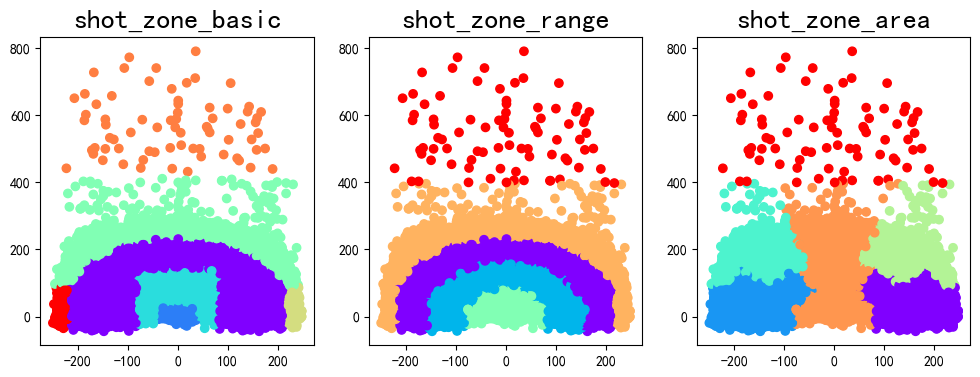

In [22]:
plt.figure(figsize=(4*3,  4))

N = ['shot_zone_basic', 'shot_zone_range', 'shot_zone_area']
for k in range(3):

    axes = plt.subplot(1, 3, k+1)
    axes.scatter(df['loc_x'], df['loc_y'], c=df[N[k]], cmap='rainbow')
    axes.set_title(N[k], fontsize=20)

plt.savefig('images/8-4.png')


### 5. 科比在每一节的出手次数对比 
- 柱形图

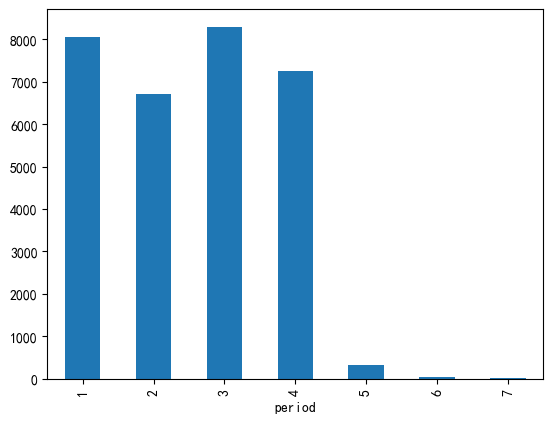

In [9]:
df.groupby('period')['period'].count().plot.bar()

plt.savefig('images/8-5.png')

plt.show()